In [2]:
episodefile = open("../data/EpisodeList.txt","r")
episodeList = []

for line in episodefile:
    episodeList.append(line.strip().lower().replace(",",""))

SeasonList = [10,10,10,10,10,10,7,6]
episodeTuple = []
ekstranumb = 0
for numb in range(len(SeasonList)):
    for i in range(SeasonList[numb]):
        episodeTuple.append((numb+1, episodeList[i+ekstranumb]))
    ekstranumb += SeasonList[numb]

In [3]:
import lyricsgenius
genius = lyricsgenius.Genius("Apa5yYNZVRkIvn1izsQWN5l957pSR9jiG24s8ExAPKE9FHY9gdq4W8P7GPavWn1n")
artist = genius.search_artist("Game of Thrones")
artist.save_lyrics()

Searching for songs by Game of Thrones...

Song 1: "Winter is Coming"
Song 2: "Tyrion’s Courtroom Speech from The Laws of Gods and Men"
Song 3: "Kill the Boy"
Song 4: "Mother’s Mercy"
Song 5: "The Kingsroad"
Song 6: "The House of Black and White"
Song 7: "The Children"
Song 8: "Hardhome"
Song 9: "Liste des personnages"
Song 10: "The Wars to Come"
Song 11: "The Queen’s Justice"
Song 12: "Lord Snow"
Song 13: "High Sparrow"
Song 14: "The Dance of Dragons"
Song 15: "The Wolf and the Lion"
Song 16: "Cripples, Bastards and Broken Things"
Song 17: "The Winds of Winter"
Song 18: "Battle of the Bastards"
Song 19: "Book of the Stranger"
Song 20: "The Door"
Song 21: "The Red Woman"
Song 22: "You Win or You Die"
Song 23: "The North Remembers"
Song 24: "The Pointy End"
Song 25: "The Mountain and the Viper"
Song 26: "Unbowed, Unbent, Unbroken"
Song 27: "Oathbreaker"
Song 28: "The Gift"
Song 29: "Dragonstone"
Song 30: "A Golden Crown"
Song 31: "Fire and Blood"
Song 32: "The Rains of Castamere"
Song 3

In [3]:
import json
jFile = open("Lyrics_GameofThrones.json", "r")
j = json.load(jFile)

#Ignore this
#Dont even worry about it
#Just a simple Dict comprehension, no need to analyze it
LyricsListDict = {j["songs"][w]["title_with_featured"].lower().replace(",",""):j["songs"][w]["lyrics"].encode("UTF-8").decode("UTF-8") 
                    for w in range(len(j["songs"])) 
                    if j["songs"][w]["title_with_featured"].lower().replace(",","") in episodeList}



In [4]:
SeasonDict = dict()
#SeasonDict format
# {Title:{Season:SeasonNumber,Script:ScriptText}}
for season, title in episodeTuple:
    SeasonDict[title] = { "season": season,"script":LyricsListDict[title]}
print(SeasonDict['winter is coming'])

{'season': 1, 'script': '35 ContributorsWinter is Coming LyricsEPISODE 1 - WINTER IS COMING[First scene opens with three Rangers riding through a tunnel, leaving the Wall, and going into the woods. (Eerie music in background) One Ranger splits off and finds a campsite full of mutilated bodies, including a child hanging from a tree branch. A birds-eye view shows the bodies arranged in a shield-like pattern. The Ranger rides back to the other two.]\n\nWAYMAR ROYCE: What d’you expect? They’re savages. One lot steals a goat from another lot and before you know it, they’re ripping each other to pieces.\n\nWILL: I’ve never seen wildlings do a thing like this. I’ve never seen a thing like this, not ever in my life.\n\nWAYMAR ROYCE: How close did you get?\n\nWILL: Close as any man would.\n\nGARED: We should head back to the wall.\n\nROYCE: Do the dead frighten you?\n\nGARED: Our orders were to track the wildlings. We tracked them. They won’t trouble us no more.\n\nROYCE: You don’t think he’ll 

In [272]:

def sceneNameChecker(screenLine:str, i:int, lineSplit:str, sceneList:list):
    
    sceneName = None
    

    if lineSplit[0].upper() == "CUT TO":
        sceneName = lineSplit[1].strip()

    elif screenLine.startswith('EXT'):
        sceneName = screenLine.strip()[4:].strip()

    elif screenLine.startswith('INT'):
        sceneName = screenLine.strip()[4:].strip()

    elif screenLine.strip().startswith("--------"):
        sceneName = "Unnamed Scene"

    elif screenLine.upper().strip().startswith("CUT TO"):
        sceneName = screenLine.strip()[7:].strip()

    elif "SCENE SHIFTS" in screenLine.upper() or "SCENE CHANGES" in screenLine.upper():
        sceneName = "Unnamed Scene"
        
    elif "NEWSCENE" in screenLine.upper():
        sceneName = "Unnamed Scene"
    elif i == 0:
        
        sceneName = "Unnamed Scene"

    

    #Giving the sceneName an extra number if the sceneName occurs multiple times
    if sceneName is not None:
        if str(sceneName) in sceneList:
            try:
                sceneNameOld = sceneName
                sceneName = str(sceneName) + "_" + str(sceneList.count(sceneName))
                sceneList.append(str(sceneNameOld))
                
            except TypeError as error:
                print("Error:", sceneName)
            
        else:
            sceneList.append(str(sceneName))
        
        return True, str(sceneName), sceneList
       
        
    return False, False, False


def createDataframefromDict(screenplayDict:dict):
 
    dfcolumns = ['Person','SeasonNr','EpisodeID','EpisodeTitle','Scene','ScreenLine']


    sceneList = []
    allLines = []
    episodeID = 0
    

    for title in screenplayDict:

        episodeTitle = title
        episodeID += 1
        seasonNr = screenplayDict[title]['season']

        sceneName = None

        screenLines = screenplayDict[title]['script'].replace("\n\n\n", "NEWSCENE\n")
        screenLines = screenLines.split("\n")[1:]
        

        for i in range(len(screenLines)):
            
            line = screenLines[i]

            lineSplit = line.strip().split(":")
            
            if len(lineSplit) > 1:

                if sceneNameChecker(line,i,lineSplit,sceneList)[0] is True:
                    _, sceneName, sceneList = sceneNameChecker(line,i,lineSplit, sceneList)
                    #print("Scene:", sceneName, "episode:", episodeID)
                    if "Scene shifts" in str(line) and len(line[0].strip()) > 0:

                        print(str(line))                

                elif len(lineSplit) >= 2:
                    if sceneName is None:
                        _, sceneName, sceneList = sceneNameChecker(line,0,lineSplit, sceneList)

                    person = str(lineSplit[0].split("(")[0].strip()).upper()
                    screenLine = str(lineSplit[1])
                    
                    newEntry = [person, seasonNr, episodeID, episodeTitle, sceneName, screenLine]
                    allLines.append(newEntry)
                    
                
            else:
                
                if "SCENE SHIFTS" in str(line).upper() or "SCENE CHANGES" in str(line).upper() and len(line[0].strip()) > 0:
                    
                    _, sceneName, sceneList = sceneNameChecker(line,0,lineSplit, sceneList)
                    
            


    df = pd.DataFrame(allLines,columns=dfcolumns)
    return df

In [273]:
import pandas as pd
df = createDataframefromDict(SeasonDict)

df.to_csv("Scene.csv")


In [274]:
import networkx as nx
G = nx.Graph()
SceneList = set(list(df.Scene))
print(len((SceneList)))
PersonList = set(list(df.Person))
print(len(PersonList))

edges = list(zip(df.Scene, df.Person))

#print(edges)
G.add_nodes_from(SceneList, bipartite = 0)
G.add_nodes_from(PersonList, bipartite = 1)

df.Person.to_csv("Person")



G.add_edges_from(edges)
print(G.edges())

bottom_nodes, top_nodes = nx.bipartite.sets(G)



1039
728
[('WINTERFELL - COURTYARD_13', 'ARYA'), ('WINTERFELL - COURTYARD_13', 'SANSA'), ("MAEGOR'S HOLDFAST_1", 'SANSA'), ("MAEGOR'S HOLDFAST_1", 'SHAE'), ("MAEGOR'S HOLDFAST_1", 'CERSEI'), ("MAEGOR'S HOLDFAST_1", 'GOLD CLOAK'), ('WINTERFELL - HALLWAY_1', 'ROOSE'), ('WINTERFELL - HALLWAY_1', 'RAMSAY'), ('WINTERFELL - HALLWAY_1', 'THEON'), ('WINTERFELL - HALLWAY_1', 'SANSA'), ("RED KEEP – TOMMEN'S CHAMBER_1", 'MAESTER PYCELLE'), ("RED KEEP – TOMMEN'S CHAMBER_1", 'CERSEI'), ("RED KEEP – TOMMEN'S CHAMBER_1", 'MAESTER PYCELL'), ("RED KEEP – TOMMEN'S CHAMBER_1", 'TOMMEN'), ("CRASTER'S KEEP, LATER_1", 'CRASTER'), ("CRASTER'S KEEP, LATER_1", 'JEOR'), ("CRASTER'S KEEP, LATER_1", 'KARL TANNER'), ("CRASTER'S KEEP, LATER_1", 'RAST'), ('Unnamed Scene_82', 'CERSEI'), ('Unnamed Scene_82', 'SER DONTOS'), ('Unnamed Scene_82', 'TYWIN'), ('Unnamed Scene_82', 'SANSA'), ('Unnamed Scene_82', 'LITTLEFINGER'), ("KING'S LANDING, TYRION'S CHAMBERS_7", 'SHAE'), ("KING'S LANDING, TYRION'S CHAMBERS_7", 'TYRION')

In [275]:
len(set(df.Scene))

1039

In [276]:
B = nx.bipartite.projected_graph(G, top_nodes)


print(len(B["SANSA"]))

219


Graph with 728 nodes and 13635 edges
['BERIC DONDARRION', 'KNIGHT 4', 'JEOR MORMONT', 'VARLY', 'STRONG', 'GERARD', 'PRISONER #2', 'UNSULLIED', 'RICKON STARK', 'SOLDIER #3', 'SERVANT', 'ROOSE', 'WALDERY FREY', 'QUICK', 'MALE VOICE #2', 'SER RODRIK', 'GIRL', 'WAIF', 'MANCE', 'BUYER', 'KHAL DROGO', 'CUARD #2', 'STREET URCHIN', 'RED PRIESTESS', "MOLE'S TOWN MADAM", 'BITER', 'BRANN STARK', 'MOUNTAIN', 'ILLYRIO', 'WALDER', 'DIM DALBA', 'TRIBESMEN OF THE VALE', 'HOT PIE', 'GUARD #2', 'MAESTER 2', 'CLARENZO', 'SHADOW TOWER BROTHER', 'GREATJON UMBER', 'RODRIK CASSAL', 'BYSTANDERS', 'GREY WORM & MISSANDEI', 'WINE MERCHANT', 'JON SNOW', 'SOLDIERS AND FREE FOLK HAND TORCHES TO JON, SANSA, ARYA, SAM, TORMUND GIANTSBANE, DAENERYS, AND GREY WORM. THEY FAN OUT TO VARIOUS PYRES IN THE FIELD, JOINING THEIR FALLEN COMRADES FOR ONE FINAL FAREWELL', 'DOTHRAKI MATRON', 'DAENARYS STORMBORN', 'FIRST MATE', 'STABLE BOY', '[JOJEN', 'HAYLENE', 'RHAKARO', 'LORD MORMONT', 'CRASTER', 'BLACK HAIRED PROSTITUTE', 'MEE

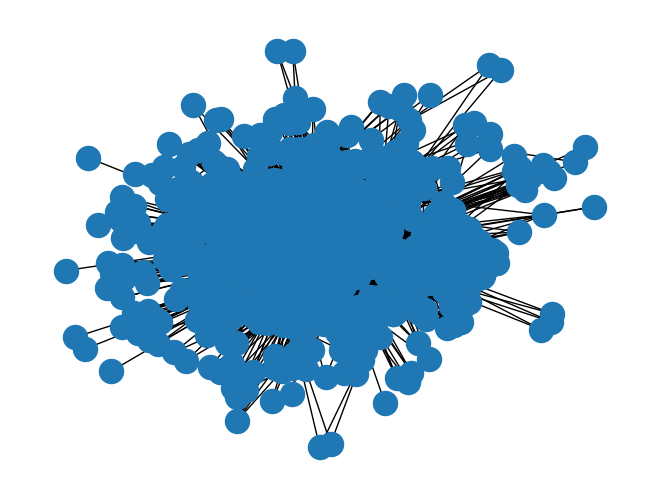

In [278]:
nx.draw(B)

print(B)

print(B.nodes())

Graph with 409 nodes and 25631 edges


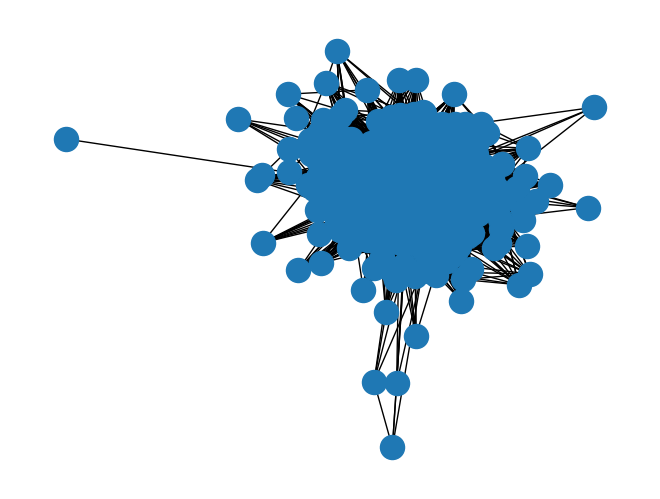

In [182]:
B = nx.bipartite.projected_graph(G, bottom_nodes)
print(B)
nx.draw(B)